In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

def sigmoid (x):
    return 1 / (1 + np.exp(-x))
def sigmoid_der (x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu (x):
    return x if x > 0 else 0
def relu_der (x):
    return 1 if x > 0 else 0

def LF (x, label):
    return 0.5 * sum((x-label)**2)
def LFD (x, label):
    return x - label
def LFN (data, labels, net):
    tmp = 0
    for i in range(len(data)):
        out, predict = net.predict(data[i])
        tmp += np.linalg.norm(out-labels[i])**2
    return 1/(2*len(data)) * tmp

In [2]:
class Net:
    def __init__(self, ls, af, afd, eta):
        self.outputs = np.array([np.ones(ls[i]+1) for i in range(0,len(ls))])
        self.errors = np.array([np.ones(ls[i]+1) for i in range(1,len(ls))])
        self.weights = np.array([np.random.normal(0,1/ls[i],(ls[i]+1,ls[i-1]+1)) for i in range(1,len(ls))])
        self.af = af
        self.afd = afd
        self.eta = eta
    
    def forward(self, x):
        self.outputs[0][1:] = x
        for i in range(len(self.weights)):
            self.outputs[i+1][1:] = self.af[i](np.dot(self.weights[i],self.outputs[i])[1:])
        #print(self.outputs[-1][1:])

    def output_error(self, label):
        out = self.outputs[-1][1:]
        self.errors[-1][1:] = LFD(out, label) * self.afd[-1](out)
        
    def backpropagate(self):
        self.errors[-2] = np.dot(self.weights[-1][1:].T,self.errors[-1][1:]) * self.afd[-1](self.outputs[-2])
        for i in range(len(self.errors)-2,0,-1):
            #print("backpropagate = ",i)
            self.errors[i-1] = np.dot(self.weights[i].T,self.errors[i]) * self.afd[i](self.outputs[i])
    
    def train(self, data, labels, epochs, *args):
        LFTest = []
        if len(args) > 0:
            data_test = args[0]
            labels_test = args[1]
            LFTest = [LFN(data_test,labels_test,self)]
        for k in range(epochs):
            i = np.random.randint(len(data))
            x = data[i]
            self.forward(x)
            self.output_error(labels[i])
            self.backpropagate()
            for i in range(len(self.weights)):
                self.weights[i] -= self.eta * np.outer(self.errors[i],self.outputs[i])
            if len(args) > 0:
                LFTest.append(LFN(data_test,labels_test,self))
        return np.arange(epochs+1), LFTest
                
    def predict(self, x):
        net.forward(x)
        tmp = net.outputs[-1][1:]
        return tmp, np.argmax(tmp)

In [3]:
chunksize = 10**4
for chunk in pd.read_csv("mnist_train.csv", chunksize=chunksize):
    df = chunk
    break
data = []
for i in range(chunksize):
    data.append(df.loc[i, :].values.tolist())
data = np.array(data) / 255

In [4]:
tmp = np.array(list(df['5']))
labels = np.zeros((chunksize,10))
for i in range(len(tmp)):
    labels[i,tmp[i]] = 1

In [5]:
chunksize_test = 10**2
for chunk in pd.read_csv("mnist_test.csv", chunksize=chunksize_test):
    df_test = chunk
    break
data_test = []
for i in range(chunksize_test):
    data_test.append(df_test.loc[i, :].values.tolist())
data_test = np.array(data_test) / 255

In [6]:
tmp = np.array(list(df_test['7']))
labels_test = np.zeros((chunksize_test,10))
for i in range(len(tmp)):
    labels_test[i,tmp[i]] = 1

In [7]:
N, M = 785, 10
eta = 0.04
reluv = np.vectorize(relu)
relu_derv = np.vectorize(relu_der)
sigmoidv = np.vectorize(sigmoid)
sigmoid_derv = np.vectorize(sigmoid_der)

af = [reluv, sigmoidv]
afd = [relu_derv, sigmoid_derv]
net = Net([N,500,M],af,afd,eta)
#net.weights

In [8]:
epochs = 10000

start = time.time()
T, LFTest = net.train(data,labels,epochs)
end = time.time()
print(end - start)

82.26776194572449


In [9]:
n = 0
for i in range(chunksize_test):
    x = data_test[i]
    l = labels_test[i]
    #print('i = ', i,'label =', l)
    net.forward(x)
    out, predict = net.predict(x)
    #print(np.argmax(net.outputs[-1][1:]))
    #a = np.reshape(x[1:], (-1, 28))
    #plt.imshow(a, cmap='hot', interpolation='nearest')
    #plt.show()
    if l[predict] != 1:
        n += 1
print('error = ', n/chunksize_test)

error =  0.14


In [10]:
#plt.plot(T, LFTest)

i =  0 label = [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
predict =  [3.57802806e-03 5.72508510e-04 3.79721151e-01 3.31067171e-02
 1.92517265e-06 4.69907188e-02 4.89852463e-02 1.95841077e-06
 6.87599441e-03 1.12977246e-05]
Correct =  True


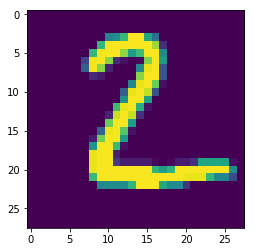

i =  1 label = [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
predict =  [2.91006617e-05 9.99487107e-01 3.39855775e-03 2.79304962e-03
 1.69846076e-03 4.81482113e-04 5.08235793e-04 1.97108923e-03
 3.06465948e-03 5.00314865e-04]
Correct =  True


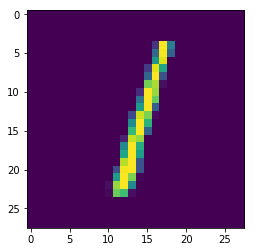

i =  2 label = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
predict =  [9.93969669e-01 7.30103222e-09 6.07836157e-06 1.63090591e-05
 1.70236533e-07 1.09590472e-04 6.24025322e-04 8.10126754e-04
 2.97504421e-05 7.89163349e-05]
Correct =  True


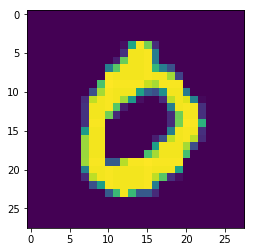

i =  3 label = [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
predict =  [5.28273061e-03 3.20254776e-04 1.28219853e-02 1.22909326e-03
 9.59472608e-01 2.28466796e-03 2.02069708e-02 7.50843192e-03
 1.58182755e-02 4.78731227e-02]
Correct =  True


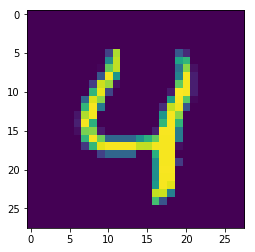

i =  4 label = [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
predict =  [1.62148356e-06 9.99789451e-01 3.22910756e-04 2.28675050e-03
 2.60566360e-04 2.26362270e-05 3.83418234e-06 1.33496405e-03
 2.50126594e-03 2.74996275e-04]
Correct =  True


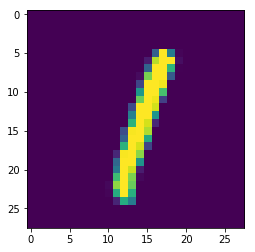

In [ ]:
for i in range(chunksize_test):
    x = data_test[i]
    l = labels_test[i]
    print('i = ', i,'label =', l)
    net.forward(x)
    out, predict = net.predict(x)
    print("predict = ", out)
    print("Correct = ", l[predict] == 1)
    a = np.reshape(x[1:], (-1, 28))
    plt.imshow(a, cmap='viridis', interpolation='nearest')
    plt.show()
    time.sleep(3)